In [1]:
from FF_Helpers import *

$x = f(\theta_s,\theta_e) = 33cos(\theta_s+\theta_e)+30cos(\theta_s)$

$y = g(\theta_s,\theta_e) = 33sin(\theta_s+\theta_e)+30sin(\theta_s)$

$\ddot{x} = \frac{\partial^2 f}{\partial \theta_s^2}\dot{\theta}_s^2 +$ $2\frac{\partial^2 f}{\partial \theta_s \partial \theta_e}\dot{\theta}_s$ 
$\dot{\theta}_e$
$ + \frac{\partial^2 f}{\partial \theta_e^2}\dot{\theta}_e^2$
 $+ \frac{\partial f}{\partial \theta_s}\ddot{\theta}_s$
 $ + \frac{\partial f}{\partial \theta_e}\ddot{\theta}_e$

 $\ddot{y} = \frac{\partial^2 g}{\partial \theta_s^2}\dot{\theta}_s^2 +$ $2\frac{\partial^2 g}{\partial \theta_s \partial \theta_e}\dot{\theta}_s$ 
$\dot{\theta}_e$
$ + \frac{\partial^2 g}{\partial \theta_e^2}\dot{\theta}_e^2$
 $+ \frac{\partial g}{\partial \theta_s}\ddot{\theta}_s$
 $ + \frac{\partial g}{\partial \theta_e}\ddot{\theta}_e$

$\gamma = \ddot{x} - \frac{\partial^2 f}{\partial \theta_s^2}\dot{\theta}_s^2 -2\frac{\partial^2 f}{\partial \theta_s \partial \theta_e}\dot{\theta}_s\dot{\theta}_e- \frac{\partial^2 f}{\partial \theta_e^2}\dot{\theta}_e^2$

 $\nu = \ddot{y} - \frac{\partial^2 g}{\partial \theta_s^2}\dot{\theta}_s^2 - 2\frac{\partial^2 g}{\partial \theta_s \partial \theta_e}\dot{\theta}_s \dot{\theta}_e - \frac{\partial^2 g}{\partial \theta_e^2}\dot{\theta}_e^2 $




$\ddot{\theta}_s = \frac{\frac{\partial f}{\partial \theta_e}\nu - \frac{\partial g}{\partial \theta_e}\gamma}{\frac{\partial f}{\partial \theta_e}\frac{\partial g}{\partial \theta_s} + \frac{\partial f}{\partial \theta_s}} $

$\ddot{\theta}_e = \frac{\frac{\partial g}{\partial \theta_s}\gamma - \frac{\partial f}{\partial \theta_s}\nu}{\frac{\partial g}{\partial \theta_s}\frac{\partial f}{\partial \theta_e} + \frac{\partial g}{\partial \theta_e}} $

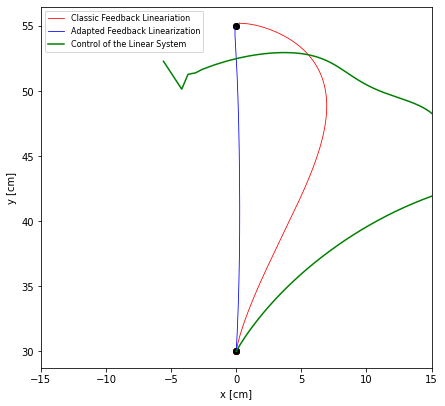

In [4]:
plt.figure(figsize=(7,11))

Feedback_Linearization_with_FF(1e7,1e7,1e4,1e4,1e-6,1e-6,alpha = 0,proportionnality = .5,pert = 0,DisplayNonlinear=True)
Feedback_Linearization_with_FF(1e7,1e7,1e4,1e4,1e-6,1e-6,alpha = 1,proportionnality = .5,pert = 0,DisplayNonlinear=True)
LQG_with_FF(1e8,1e8,1000,1000,1e-5,1e-5,proportionnality = 0.5,pert = 2)

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')     
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
plt.grid()
plt.xlim((-15,15))
plt.legend(fontsize = 8,loc = "upper left")

METHOD : 

1. Determine k from F = kydot
2. Determine for a range of y the error evolution , attention tous les mouvements ne prennent pas le même temps!
3. 

In [98]:
data = loadmat("Data/XP1/F2_data.mat")["F2_data"][0]

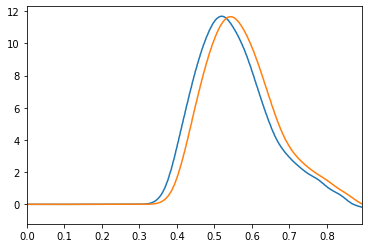

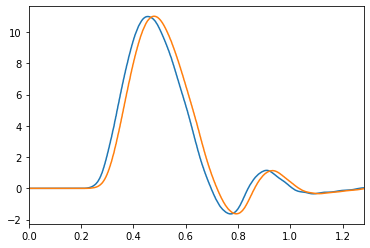

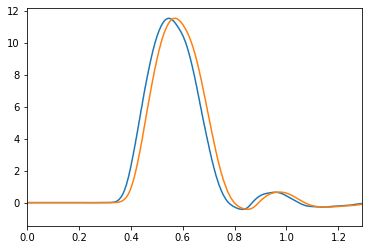

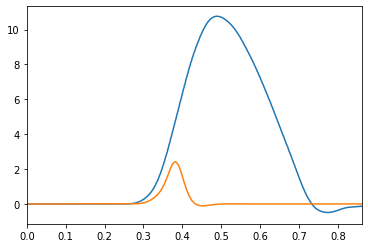

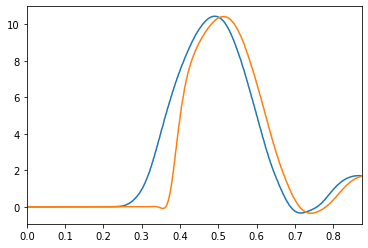

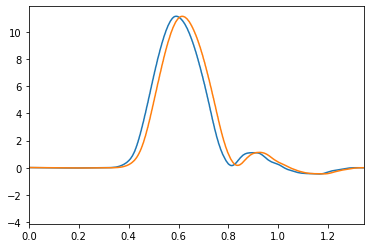

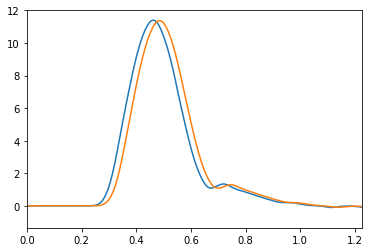

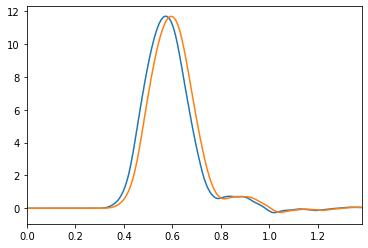

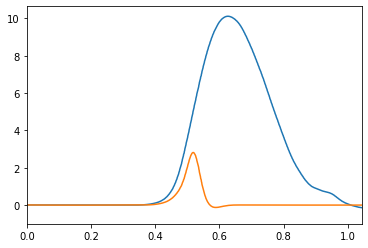

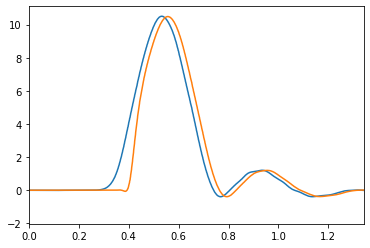

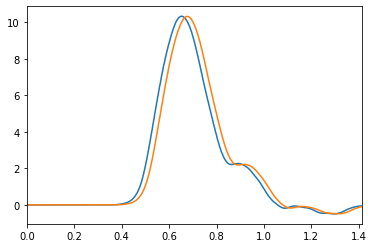

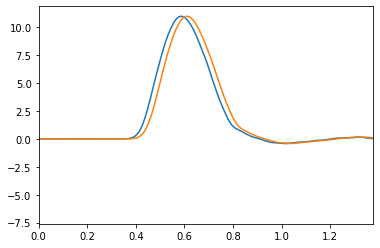

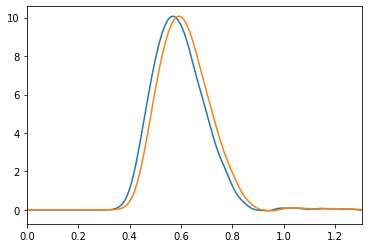

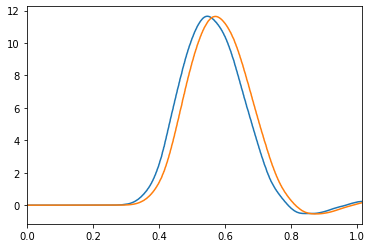

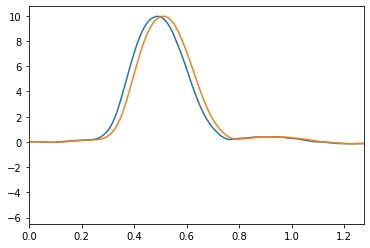

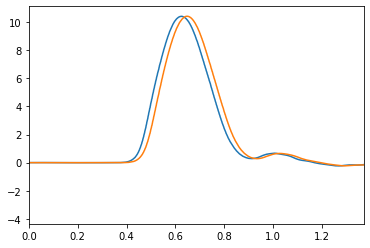

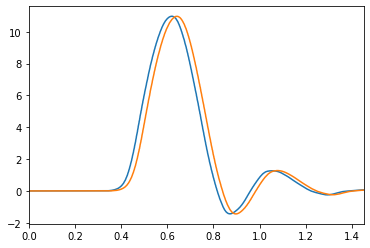

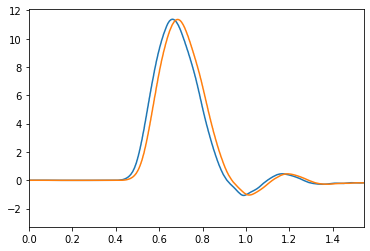

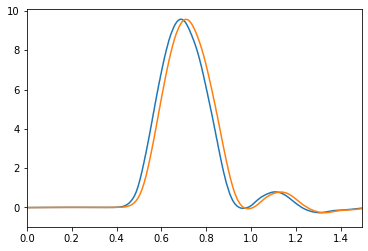

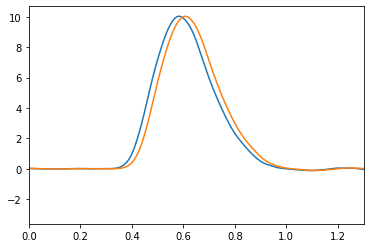

In [85]:

for trial in range(15,35):
    plt.plot(data[trial]["Right_FS_TimeStamp"].flatten()-data[trial]["Right_FS_TimeStamp"][0]-data[trial]["EVENTS"]["TIMES"][0,0][0,1],(data[trial]["Right_HandYVel"]).flatten()*13)
    plt.plot(data[trial]["Right_FS_TimeStamp"].flatten()-data[trial]["Right_FS_TimeStamp"][0]-data[trial]["EVENTS"]["TIMES"][0,0][0,1],(data[trial]["Right_Hand_ForceCMD_X"]).flatten())
    plt.xlim(0,data[trial]["EVENTS"]["TIMES"][0,0][0,5]-data[trial]["EVENTS"]["TIMES"][0,0][0,1])
    plt.show()


In [20]:
data = loadmat("Data/XP1/F12_data.mat")["F12_data"][0]

In [64]:

print(data[220].dtype)
print(data[220]["ANALOG"])





[('Right_HandX', 'O'), ('Right_HandY', 'O'), ('Right_HandXVel', 'O'), ('Right_HandYVel', 'O'), ('Right_HandXAcc', 'O'), ('Right_HandYAcc', 'O'), ('Right_Hand_ForceCMD_X', 'O'), ('Right_Hand_ForceCMD_Y', 'O'), ('Left_HandX', 'O'), ('Left_HandY', 'O'), ('Left_HandXVel', 'O'), ('Left_HandYVel', 'O'), ('Left_HandXAcc', 'O'), ('Left_HandYAcc', 'O'), ('Left_Hand_ForceCMD_X', 'O'), ('Left_Hand_ForceCMD_Y', 'O'), ('Right_L1Ang', 'O'), ('Right_L2Ang', 'O'), ('Right_L1Vel', 'O'), ('Right_L2Vel', 'O'), ('Right_L1Acc', 'O'), ('Right_L2Acc', 'O'), ('Right_M1TorCMD', 'O'), ('Right_M2TorCMD', 'O'), ('Right_FS_ForceX', 'O'), ('Right_FS_ForceY', 'O'), ('Right_FS_ForceZ', 'O'), ('Right_FS_TorqueX', 'O'), ('Right_FS_TorqueY', 'O'), ('Right_FS_TorqueZ', 'O'), ('Right_FS_TimeStamp', 'O'), ('Right_FS_Status', 'O'), ('Left_L1Ang', 'O'), ('Left_L2Ang', 'O'), ('Left_L1Vel', 'O'), ('Left_L2Vel', 'O'), ('Left_L1Acc', 'O'), ('Left_L2Acc', 'O'), ('Left_M1TorCMD', 'O'), ('Left_M2TorCMD', 'O'), ('Left_FS_ForceX', 'O

0.0 1.5245259272869354 29.5 46.0


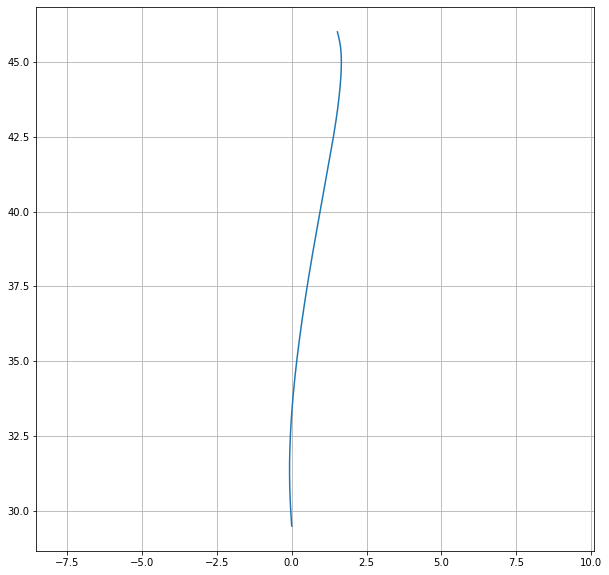

In [33]:
plt.figure(figsize = (10,10))
plt.grid()
Average_Curve(data,trial)

On part en x = 9, y = 9 et on arrive en x = 10.3, y = 26.5

### Computation of Optimal Proportional Factors

In [2]:
ACTIVATION = True

Optimization = Optimal_Factors(ACTIVATION)

0.37750000000000006
0.34750000000000003
0.5
0.47250000000000003
0.43000000000000005
0.44500000000000006
0.37
0.2
0.4225
0.4075
0.2825
0.5


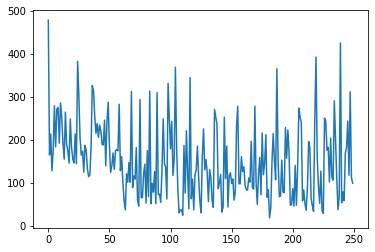

In [2]:
Compute_Mean_Error()


In [3]:
def Compute_Alpha():
    print("Enter")
    TOTAL_SUBJ = 12
    Alphas = np.zeros((TOTAL_SUBJ,250))
    for subj in range(1,TOTAL_SUBJ+1):
        print(subj)
        data = loadmat("Data/XP1/F"+str(subj)+"_data.mat")["F"+str(subj)+"_data"][0]
        Big_X = np.zeros((101,100))
        for alpha in np.linspace(0,1,100):
            
            X,Y = Feedback_Linearization_with_FF(1e7,1e7,1e4,1e4,1e-6,1e-6,alpha = alpha,starting_point= [0,9.4+DEVIATION],targets = [1,26.1+DEVIATION],proportionnality=OPTIMAL_FACTORS[subj-1],plot = False,pert = ONSET_PERTURBATION,DisplayNonlinear=True)
            x_interp = interp1d( Y,X)
            Y = np.linspace(9.5+DEVIATION,26+DEVIATION,100)
            Xref = x_interp(Y)
            Big_X[int(alpha*100)] = Xref
        for trial in range(250):
            min_e = np.infty
            min_a = -1
            if Valid_Trial(data,trial):
                for best_alpha in range(101):
                    e = Compute_deviation(preprocess(data,trial,N = 100)[0],Big_X[best_alpha])
                    if e < min_e :
                        min_e = e
                        min_a = best_alpha/100
                Alphas[subj-1,trial] = min_a
            else:
                Alphas[subj-1,trial] = nan
        #Better_Error_Array = np.zeros(250-length)
        #Total_Better_Array[subj-1] = Better_Error_Array
    return Alphas

In [4]:
Alphas = Compute_Alpha()

Enter
1
2
3
4
5
6
7
8
9
10
11
12


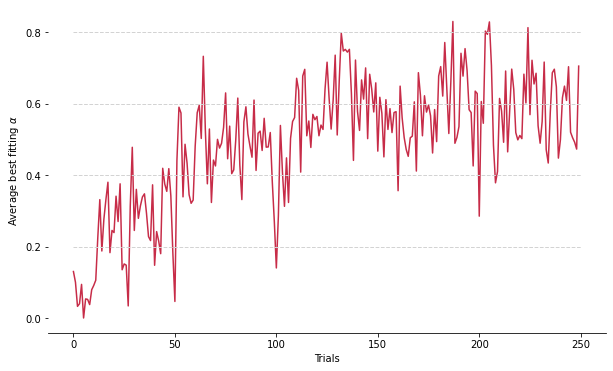

In [21]:
fig,ax = plt.subplots(figsize=(10,6))
plt.plot(np.arange(0,250),np.nanmean(Alphas,axis = 0),color = "#C72C48")
plt.xlabel("Trials")
for height in [0.2,0.4,0.6,0.8]:
    ax.plot(
        np.linspace(0,250,100),
        np.ones(100)*height,
        color="lightgray",
        linestyle="--",
        linewidth=1,
    )
plt.ylabel(r"Average best fitting $\alpha$")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

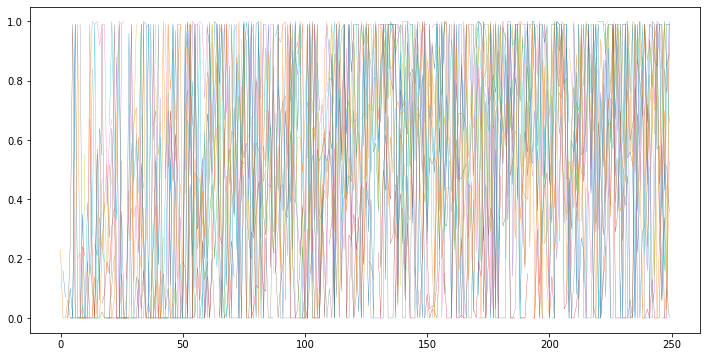

In [5]:
def Compute_Alpha_per_subj():
    plt.figure(figsize= (12,6))
    TOTAL_SUBJ = 12
    Alphas = np.zeros((TOTAL_SUBJ,250))
    for subj in range(1,TOTAL_SUBJ+1):
        data = loadmat("Data/XP1/F"+str(subj)+"_data.mat")["F"+str(subj)+"_data"][0]
        Big_X = np.zeros((101,100))
        for alpha in np.linspace(0,1,100):
            X,Y = Feedback_Linearization_with_FF(1e7,1e7,1e4,1e4,1e-6,1e-6,alpha = alpha,starting_point= [0,9.4+DEVIATION],targets = [1,26.1+DEVIATION],proportionnality=OPTIMAL_FACTORS[subj-1],plot = False,pert = ONSET_PERTURBATION,DisplayNonlinear=True)
            x_interp = interp1d( Y,X)
            Y = np.linspace(9.5+DEVIATION,26+DEVIATION,100)
            Xref = x_interp(Y)
            Big_X[int(alpha*100)] = Xref
        for trial in range(250):
            min_e = np.infty
            min_a = -1
            if Valid_Trial(data,trial):
                for best_alpha in range(101):
                    e = Compute_deviation(preprocess(data,trial,N = 100)[0],Big_X[best_alpha])
                    if e < min_e :
                        min_e = e
                        min_a = best_alpha/100
                Alphas[subj-1,trial] = min_a
            else:
                Alphas[subj-1,trial] = nan
        #Better_Error_Array = np.zeros(250-length)
        #Total_Better_Array[subj-1] = Better_Error_Array
        plt.plot(np.arange(0,250),Alphas[subj-1],linewidth = .3)
    plt.xlabel = "Trials"
    plt.ylabel = "Alpha"

Compute_Alpha_per_subj()

Resampling Illustration

[29.5        29.52754591 29.55509182 29.58263773 29.61018364 29.63772955
 29.66527546 29.69282137 29.72036728 29.74791319 29.7754591  29.80300501
 29.83055092 29.85809683 29.88564274 29.91318865 29.94073456 29.96828047
 29.99582638 30.02337229 30.0509182  30.07846411 30.10601002 30.13355593
 30.16110184 30.18864775 30.21619366 30.24373957 30.27128548 30.29883139
 30.3263773  30.35392321 30.38146912 30.40901503 30.43656093 30.46410684
 30.49165275 30.51919866 30.54674457 30.57429048 30.60183639 30.6293823
 30.65692821 30.68447412 30.71202003 30.73956594 30.76711185 30.79465776
 30.82220367 30.84974958 30.87729549 30.9048414  30.93238731 30.95993322
 30.98747913 31.01502504 31.04257095 31.07011686 31.09766277 31.12520868
 31.15275459 31.1803005  31.20784641 31.23539232 31.26293823 31.29048414
 31.31803005 31.34557596 31.37312187 31.40066778 31.42821369 31.4557596
 31.48330551 31.51085142 31.53839733 31.56594324 31.59348915 31.62103506
 31.64858097 31.67612688 31.70367279 31.7312187  31.7

TypeError: 'str' object is not callable

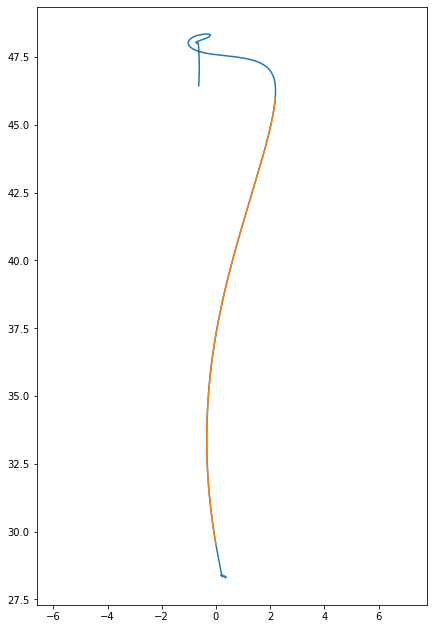

In [35]:
Resampling_Illustration()

9.284035980083786


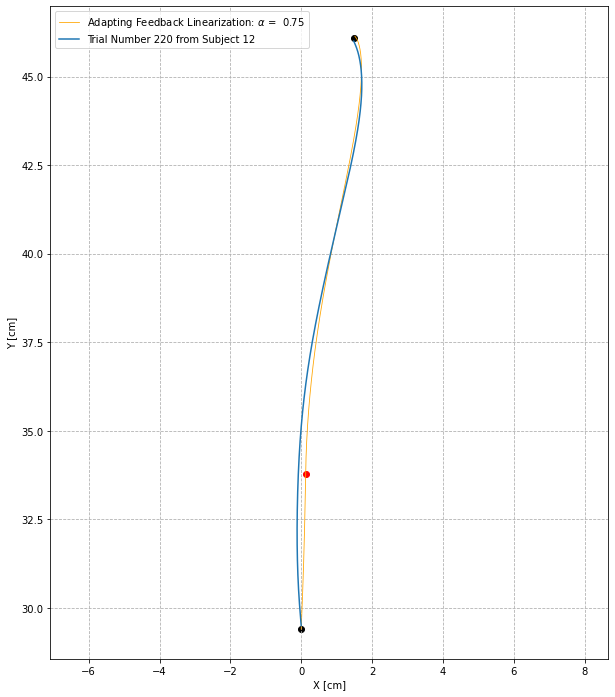

In [9]:
#Alpha = 0.84
plt.figure(figsize = (10,12))



trial = 220
data = loadmat("Data/XP1/F12_data.mat")["F12_data"][0]
Xdata,Ydata,t,thetas,thetae,load = preprocess(data,trial,N = 600)

factor = OPTIMAL_FACTORS[11]
X,Y = Feedback_Linearization_with_FF(1e7,1e7,1e4,1e4,1e-6,1e-6,alpha = 0.75,starting_point= [0,29.4],targets = [Xdata[-1],46.1],proportionnality=factor,plot = True,pert = 33.75,DisplayNonlinear=True,Noise_Variance=1e-12)
x_interp = interp1d( Y,X)
Y = np.linspace(9.5+DEVIATION,26+DEVIATION,600)
Xref = x_interp(Y)
print(Compute_deviation(Xdata,Xref))


plt.plot(Xdata,Ydata,label = "Trial Number "+str(trial)+" from Subject 12")

            
plt.legend(fontsize = 10)
plt.show()

#Alpha = 0.2

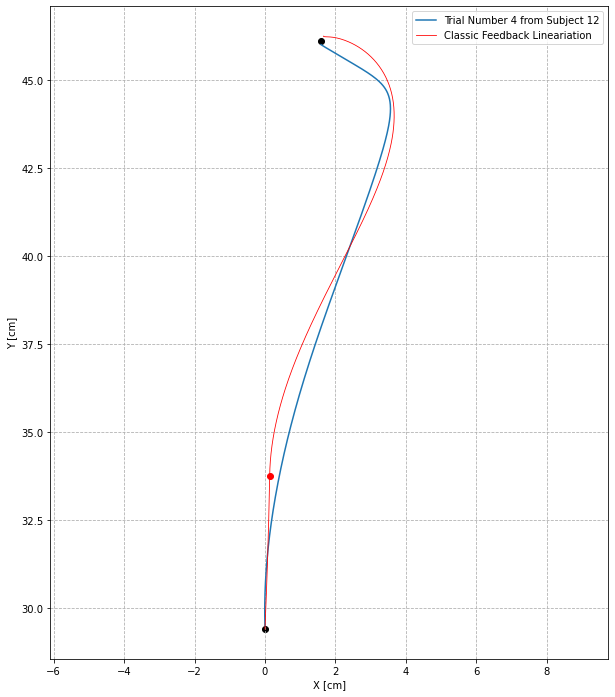

In [16]:
plt.figure(figsize = (10,12))

trial = 4
data = loadmat("Data/XP1/F2_data.mat")["F2_data"][0]
Xdata,Ydata,t,thetas,thetae,load = preprocess(data,trial,N = 600)
plt.plot(Xdata,Ydata,label = "Trial Number "+str(trial)+" from Subject 12")
factor = OPTIMAL_FACTORS[11]
X,Y = Feedback_Linearization_with_FF(1e7,1e7,1e4,1e4,1e-6,1e-6,alpha = 0,starting_point= [0,29.4],targets = [Xdata[-1],46.1],proportionnality=factor,plot = True,pert = 33.75,DisplayNonlinear=True)
x_interp = interp1d( Y,X)
Y = np.linspace(9.5+DEVIATION,26+DEVIATION,600)
Xref = x_interp(Y)
plt.legend(fontsize = 10)
plt.show()


9.981993640614146


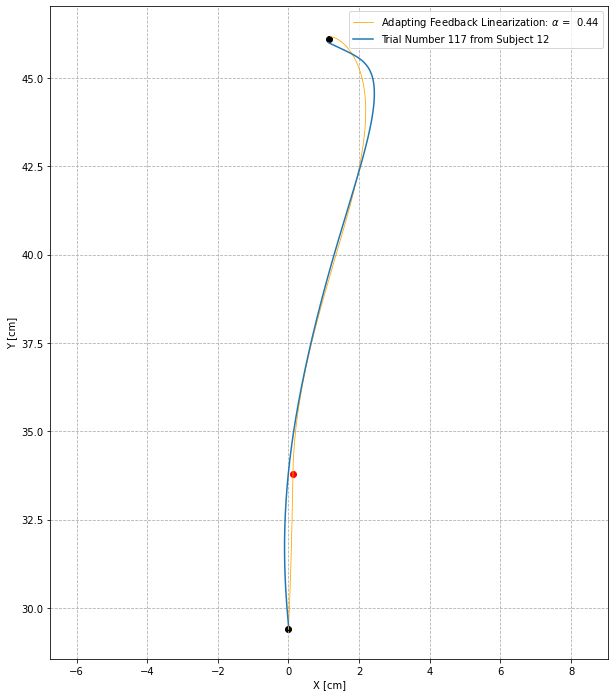

In [18]:
plt.figure(figsize = (10,12))

trial = 117
data = loadmat("Data/XP1/F12_data.mat")["F12_data"][0]
Xdata,Ydata,t,thetas,thetae,load = preprocess(data,trial,N = 600)
factor = OPTIMAL_FACTORS[11]
X,Y = Feedback_Linearization_with_FF(1e7,1e7,1e4,1e4,1e-6,1e-6,alpha = 0.44,starting_point= [0,29.4],targets = [Xdata[-1],46.1],proportionnality=factor,plot = True,pert = 33.75,DisplayNonlinear=True,Noise_Variance=1e-12)
x_interp = interp1d( Y,X)
Y = np.linspace(9.5+DEVIATION,26+DEVIATION,600)
Xref = x_interp(Y)
print(Compute_deviation(Xdata,Xref))
plt.plot(Xdata,Ydata,label = "Trial Number "+str(trial)+" from Subject 12")

plt.legend(fontsize = 10)

9.70140656661392


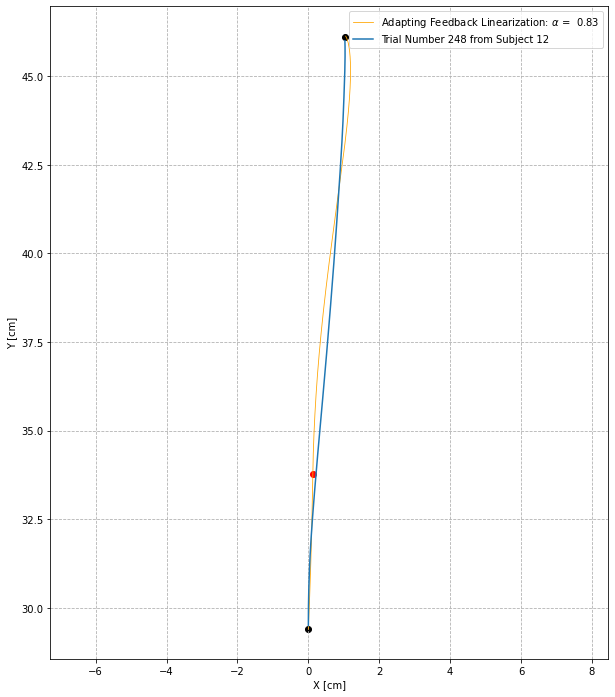

In [32]:
plt.figure(figsize = (10,12))

trial = 248
data = loadmat("Data/XP1/F5_data.mat")["F5_data"][0]
Xdata,Ydata,t,thetas,thetae,load = preprocess(data,trial,N = 600)
factor = OPTIMAL_FACTORS[11]
X,Y = Feedback_Linearization_with_FF(1e7,1e7,1e4,1e4,1e-6,1e-6,alpha = 0.83,starting_point= [0,29.4],targets = [Xdata[-1],46.1],proportionnality=factor,plot = True,pert = 33.75,DisplayNonlinear=True,Noise_Variance=1e-12)
x_interp = interp1d( Y,X)
Y = np.linspace(9.5+DEVIATION,26+DEVIATION,600)
Xref = x_interp(Y)
print(Compute_deviation(Xdata,Xref))
plt.plot(Xdata,Ydata,label = "Trial Number "+str(trial)+" from Subject 12")

plt.legend(fontsize = 10)